<a href="https://colab.research.google.com/github/Suryatanari/Image-classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 4.25 ms (started: 2021-06-16 06:28:05 +00:00)


**Data Gathering**

In [ ]:
!pip install bing-image-downloader


time: 3.14 s (started: 2021-06-14 10:26:51 +00:00)


In [ ]:
!mkdir '/content/drive/MyDrive/Minor Project BA/Dataset'

mkdir: cannot create directory ‘/content/drive/MyDrive/Minor Project BA/Dataset’: File exists


In [ ]:
from bing_image_downloader import downloader

downloader.download("grapes",limit=100,output_dir='/content/drive/MyDrive/Minor Project BA/Dataset',adult_filter_off=True)

In [ ]:
downloader.download("banana",limit=100,output_dir="/content/drive/MyDrive/Minor Project BA/Dataset",adult_filter_off=True)

In [ ]:
downloader.download("apple fruit",limit=100,output_dir='/content/drive/MyDrive/Minor Project BA/Dataset',adult_filter_off=True)

**Preprocessing**

(60, 67500)


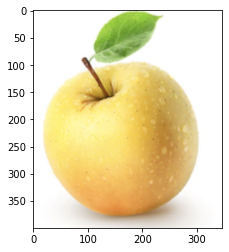

time: 4.38 s (started: 2021-06-16 06:32:13 +00:00)


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread as imread
from skimage.transform import resize

dir='/content/drive/MyDrive/Minor Project BA/Dataset'
categories=['banana','apple']
target=[]
flat_img=[]

for category in categories:
  class_num=categories.index(category)
  #print(category)
  path=os.path.join(dir,category)
  #print(path)
  for img in os.listdir(path):
    #print(img)

    img_array = imread(os.path.join(path,img)) #joining the path and image
    #print(img_array.shape)
    plt.imshow(img_array)

    img_resize=resize(img_array,(150,150,3)) #resize and drop the pixels to 200
    #print(img_array.shape)
    #print(img_resize.shape)

    flat_img.append(img_resize.flatten())
    target.append(class_num)
    #plt.imshow(img_resize)
    #plt.show
flat_img=np.array(flat_img)
target=np.array(target)
print(flat_img.shape)




In [ ]:
flat_img[0]   #it shows the normalizes  0 to 1

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])

time: 5.47 ms (started: 2021-06-16 06:32:21 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 6.69 ms (started: 2021-06-16 06:32:24 +00:00)


<BarContainer object of 2 artists>

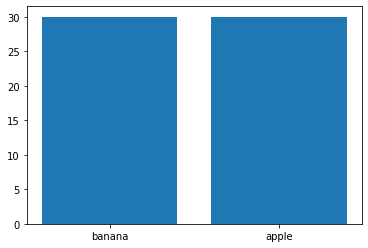

time: 164 ms (started: 2021-06-16 06:32:27 +00:00)


In [ ]:

unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)


10000

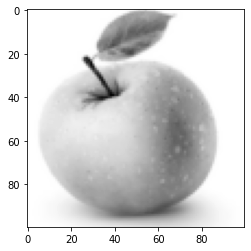

time: 233 ms (started: 2021-06-16 06:32:30 +00:00)


In [ ]:
from skimage.color import rgb2gray

img_resize=resize(img_array,(100,100))
img_gray=rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size

In [ ]:
df=pd.DataFrame(flat_img)
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.998039,1.000000,0.996078,0.996196,0.996314,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.994141,0.992298,0.995448,0.992157,0.992157,0.995425,0.994604,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999346,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.596859,0.789163,0.958170,0.569192,0.799176,0.961163,0.561438,0.806486,0.962293,0.563399,0.813627,0.962712,0.563229,0.816314,0.963778,0.566230,0.819543,0.964031,0.577640,0.817599,0.964690,0.602235,0.819804,0.964771,0.607843,0.807935,0.962122,0.592135,0.809804,0.962092,0.589274,0.807431,0.961438,0.584837,0.801961,0.960784,0.586928,0.799412,0.960588,0.583516,...,0.565251,0.754902,0.951634,0.554902,0.752941,0.950980,0.552779,0.754784,0.950941,0.563269,0.764368,0.952937,0.562593,0.768719,0.954932,0.548824,0.774706,0.956928,0.540738,0.778684,0.956863,0.551790,0.778118,0.956209,0.569379,0.775647,0.955962,0.581516,0.774497,0.955451,0.573312,0.779035,0.956410,0.567699,0.779569,0.956863,0.567320,0.778431,0.956863,0
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.

time: 239 ms (started: 2021-06-16 06:32:33 +00:00)


**Splitting data for Testing and Training**




In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_img,target,test_size=0.3,
                                               random_state=100)


time: 35 ms (started: 2021-06-16 06:32:37 +00:00)


**Using SVM algorithm**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
param_grid=[
            {'C':[1,10,100,1000],'kernal':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernal':['rbf']},
] 

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
for kernel in ('linear','poly','rbf'):
   clf = svm.SVC(kernel=kernel, gamma='auto')
   clf.fit(x_train, y_train)
   
clf.fit(x_train,y_train)

       


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 811 ms (started: 2021-06-16 06:32:51 +00:00)


In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

time: 109 ms (started: 2021-06-16 06:32:55 +00:00)


Accuracy checking

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8888888888888888

time: 12.1 ms (started: 2021-06-16 06:32:58 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[9, 1],
       [1, 7]])

time: 5.32 ms (started: 2021-06-16 06:33:00 +00:00)


**Tesing with new image**

Enter URL : /content/drive/MyDrive/Minor Project BA/Dataset/Screen Shot 2018-06-08 at 5.34.21 PM.png
(402, 374, 4)
Predicted Output:apple


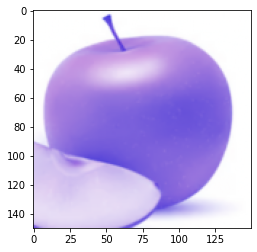

time: 9.58 s (started: 2021-06-16 06:41:31 +00:00)


In [ ]:
flat_img=[]
url=input('Enter URL : ')
img=imread(url)
img_resize=resize(img,(150,150,3))
flat_img.append(img_resize.flatten())
flat_img=np.array(flat_img)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_img)
y_out=categories[y_out[0]]


print(f'Predicted Output:{y_out}')

**Using Logistic Regression**

In [48]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)


time: 123 ms (started: 2021-06-16 07:06:44 +00:00)


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred # Predicted Value

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

time: 2.51 s (started: 2021-06-16 07:06:47 +00:00)


In [50]:
model.score(x_test,y_test)

0.8333333333333334

time: 16 ms (started: 2021-06-16 07:06:52 +00:00)


In [51]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

time: 5.73 ms (started: 2021-06-16 07:06:54 +00:00)


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.88      0.78      0.82         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18

time: 15.8 ms (started: 2021-06-16 07:06:58 +00:00)


In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.76 ms (started: 2021-06-16 07:07:07 +00:00)


In [54]:
accuracy_score(y_pred,y_test)

0.8333333333333334

time: 10.8 ms (started: 2021-06-16 07:07:09 +00:00)


In [55]:
confusion_matrix(y_pred,y_test)


array([[8, 1],
       [2, 7]])

time: 8.68 ms (started: 2021-06-16 07:07:11 +00:00)


In [56]:
#saving the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 69.7 ms (started: 2021-06-16 07:07:14 +00:00)


In [57]:
model=pickle.load(open('img_model.p','rb'))

time: 29.6 ms (started: 2021-06-16 07:07:16 +00:00)


**Testing new image**

Enter URL : https://i.pinimg.com/originals/5b/05/81/5b0581463a572b1f6f3ae96bf0de6efc.jpg
(893, 894, 3)
Predicted Output:apple


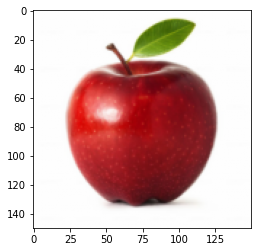

time: 3min 22s (started: 2021-06-16 07:07:22 +00:00)


In [58]:
flat_img=[]
url=input('Enter URL : ')
img=imread(url)
img_resize=resize(img,(150,150,3))
flat_img.append(img_resize.flatten())
flat_img=np.array(flat_img)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_img)
y_out=categories[y_out[0]]


print(f'Predicted Output:{y_out}')

In [ ]:
|
